Step 100 | Total Mass Error: 3.77e-15
Step 200 | Total Mass Error: 6.44e-15
Step 300 | Total Mass Error: 8.22e-15
Step 400 | Total Mass Error: 9.55e-15
Step 500 | Total Mass Error: 1.04e-14


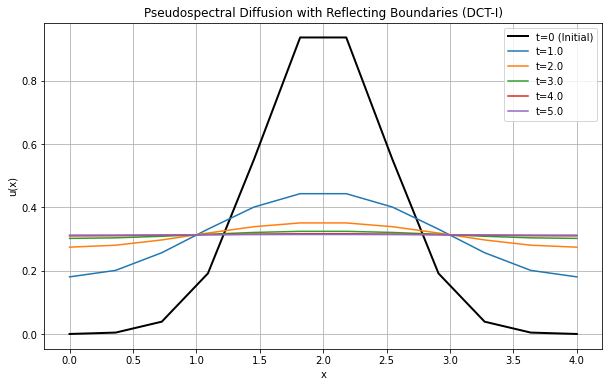

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dct, idct

# 1. Parameters
L = 4.0            # Domain length
N = 12             # Number of grid points
alpha = 0.5         # Diffusion coefficient
dt = 0.01           # Time step
steps = 500         # Number of iterations

# 2. Spatial Grid (DCT-I uses points ON the boundaries)
x = np.linspace(0, L, N)
dx = x[1] - x[0]

# 3. Initial Condition: A Gaussian pulse in the center
u = np.exp(-(x - L/2)**2 / (2 * 0.5**2))

# # 3. Initial Condition: A Gaussian pulse in the left
# u = np.exp(-(x - L/4)**2 / (2 * 0.5**2))

# 4. Prepare Wavenumbers for the Second Derivative
# In DCT-I, the basis functions are cos(k * pi * x / L)
# The second derivative of cos(px) is -p^2 * cos(px)
k = np.arange(N)
wavenumbers_sq = (k * np.pi / L)**2

# 5. Time Stepping Loop
plt.figure(figsize=(10, 6))
plt.plot(x, u, label='t=0 (Initial)', color='black', lw=2)

initial_mass = (np.sum(u)-0.5*(u[0]+u[-1])) * dx

for i in range(1, steps + 1):
    # --- Pseudospectral Step ---
    
    # a. Transform to spectral domain (DCT-I)
    u_hat = dct(u, type=1)
    
    # b. Compute Laplacian in spectral domain: multiply by -k^2
    # We use the implicit-explicit integration or simple spectral decay
    # For heat equation: u_hat(t+dt) = u_hat(t) * exp(-alpha * k^2 * dt)
    u_hat_new = u_hat * np.exp(-alpha * wavenumbers_sq * dt)
    
    # c. Transform back to spatial domain (IDCT-I)
    u = idct(u_hat_new, type=1)
    
    # 6. Verification of Conservation
    if i % 100 == 0:
        current_mass = (np.sum(u)-0.5*(u[0]+u[-1])) * dx
        print(f"Step {i:3d} | Total Mass Error: {current_mass - initial_mass:.2e}")
        plt.plot(x, u, label=f't={i*dt:.1f}')

# 6. Final Plot Formatting
plt.title("Pseudospectral Diffusion with Reflecting Boundaries (DCT-I)")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()

[0.16666667 0.5        0.83333333 1.16666667 1.5        1.83333333
 2.16666667 2.5        2.83333333 3.16666667 3.5        3.83333333]
[0.00120386 0.011109   0.06572853 0.24935221 0.60653066 0.94595947
 0.94595947 0.60653066 0.24935221 0.06572853 0.011109   0.00120386]
[ 0.          0.61685028  2.4674011   5.55165248  9.8696044  15.42125688
 22.2066099  30.22566348 39.4784176  49.96487228 61.68502751 74.63888328]
3.759767445092592
[1.         0.98977183 0.95971074 0.9116241  0.84832335 0.77335201
 0.69065824 0.60425375 0.51789973 0.43485272 0.35769172 0.28823436]
[ 7.51953489e+00 -5.70918788e-16 -5.52446337e+00  7.60123094e-16
  2.18959833e+00  1.13443835e-16 -4.68699410e-01 -4.65178223e-16
  5.39295076e-02 -1.05740565e-16 -3.44361537e-03  6.46679259e-16]
[ 7.51953489e+00 -5.65079333e-16 -5.30188684e+00  6.92946534e-16
  1.85748739e+00  8.77320179e-17 -3.23711110e-01 -2.81085684e-16
  2.79300774e-02 -4.59815728e-17 -1.23175269e-03  1.86395181e-16]
[0.00265977 0.01771721 0.08504837 0.27

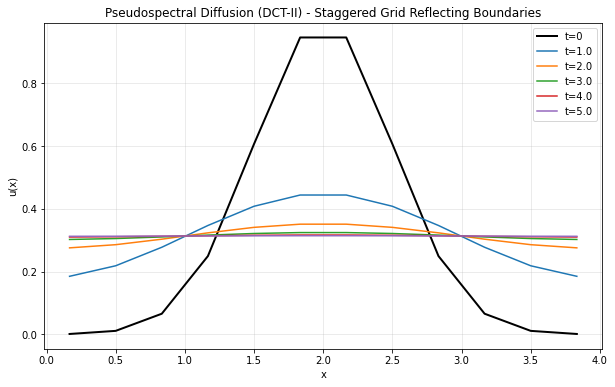

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dct, idct

# 1. Parameters
L = 4.0            # Domain length
N = 12             # Number of grid points
alpha = 0.5         # Diffusion coefficient
dt = 0.01           # Time step
steps = 500         # Number of iterations

# 2. Staggered Spatial Grid (Points are in the middle of cells)
dx = L / N
x = (np.arange(N) + 0.5) * dx

# 3. Initial Condition: Gaussian pulse
u = np.exp(-(x - L/2)**2 / (2 * 0.5**2))

# 4. Prepare Wavenumbers
# The basis functions for DCT-II correspond to cos(k * pi * x / L)
# The discrete wavenumbers match the continuous ones for the interval [0, L]
k = np.arange(N)
wavenumbers_sq = (k * np.pi / L)**2

print(x)
print(u)
print(wavenumbers_sq)

# 5. Time Stepping Loop
plt.figure(figsize=(10, 6))
plt.plot(x, u, label='t=0', color='black', lw=2)

initial_mass = np.sum(u) * dx

print(np.sum(u))

# alpha = 1/6         # Diffusion coefficient
# dt = 0.1           # Time step
print(np.exp(-1/6 * wavenumbers_sq * 0.1))
print(dct(u, type=2))
print(dct(u, type=2)*np.exp(-1/6 * wavenumbers_sq * 0.1))
qout = dct(dct(u, type=2)*np.exp(-1/6 * wavenumbers_sq * 0.1), type=3)/(2*N)
print(qout)
print(sum(qout))

for i in range(1, steps + 1):
    # --- Pseudospectral Step ---
    
    # a. Transform to spectral domain (DCT-II)
    # Use norm='ortho' to handle scaling automatically
    u_hat = dct(u, type=2)
    
    # b. Apply the Diffusion Operator in Fourier Space
    # Exact solution for u_t = alpha * u_xx is multiplication by exp(-alpha * k^2 * t)
    u_hat_new = u_hat * np.exp(-alpha * wavenumbers_sq * dt)
    
    # c. Transform back to spatial domain (DCT-III is the inverse of DCT-II)
    u = dct(u_hat_new, type=3)/(2*N)
    
    # 6. Verification of Conservation
    if i % 100 == 0:
        current_mass = np.sum(u) * dx
        print(f"Step {i:3d} | Total Mass Error: {current_mass - initial_mass:.2e}")
        plt.plot(x, u, label=f't={i*dt:.1f}')

plt.title("Pseudospectral Diffusion (DCT-II) - Staggered Grid Reflecting Boundaries")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Step 100 | Total Mass Error: -3.33e-15
Step 200 | Total Mass Error: -7.11e-15
Step 300 | Total Mass Error: -7.77e-15
Step 400 | Total Mass Error: -7.77e-15
Step 500 | Total Mass Error: -7.55e-15


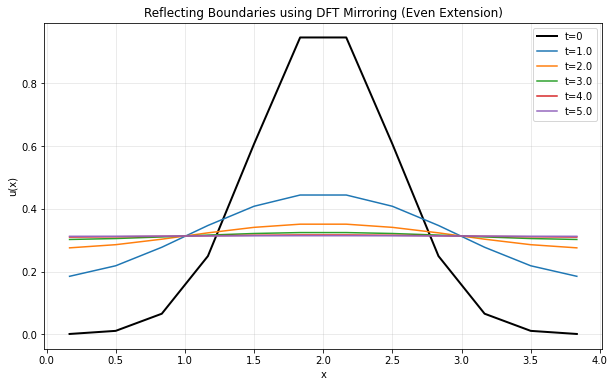

In [161]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Parameters
L = 4.0            # Physical domain length
N = 12              # Points in physical domain
alpha = 0.5         # Diffusion coefficient
dt = 0.01           # Time step
steps = 500         # Number of iterations

# 2. Spatial Grid
dx = L / N
x = (np.arange(N) + 0.5) * dx  # Staggered grid (Half-sample)

# 3. Initial Condition: Gaussian pulse
u = np.exp(-(x - L/2)**2 / (2 * 0.5**2))

# 4. Prepare Wavenumbers for the EXTENDED domain (Length 2L)
# The period is now 2*L because we mirror the data
M = 2 * N
L_ext = 2 * L
# Standard DFT wavenumbers for length M and period L_ext
k = 2 * np.pi * np.fft.fftfreq(M, d=(L_ext/M))
wavenumbers_sq = k**2

# 5. Time Stepping Loop
plt.figure(figsize=(10, 6))
plt.plot(x, u, label='t=0', color='black', lw=2)

initial_mass = np.sum(u) * dx

for i in range(1, steps + 1):
    # --- Pseudospectral DFT Mirroring Step ---
    
    # a. Create Even Extension (Reflecting Symmetry)
    # This makes u_ext symmetric: [u0, u1, ... uN-1, uN-1, ... u0]
    u_ext = np.concatenate([u, u[::-1]])
    
    # b. Forward FFT
    u_hat = np.fft.fft(u_ext)
    
    # c. Apply Diffusion in Spectral Space
    # Update: u_hat(t+dt) = u_hat(t) * exp(-alpha * k^2 * dt)
    u_hat_new = u_hat * np.exp(-alpha * wavenumbers_sq * dt)
    
    # d. Inverse FFT and extract the real part
    u_ext_new = np.real(np.fft.ifft(u_hat_new))
    
    # e. Take only the first half (the physical domain)
    u = u_ext_new[:N]
    
    # 6. Verification of Conservation
    if i % 100 == 0:
        current_mass = np.sum(u) * dx
        print(f"Step {i:3d} | Total Mass Error: {current_mass - initial_mass:.2e}")
        plt.plot(x, u, label=f't={i*dt:.1f}')

plt.title("Reflecting Boundaries using DFT Mirroring (Even Extension)")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

[0.16666667 0.5        0.83333333 1.16666667 1.5        1.83333333
 2.16666667 2.5        2.83333333 3.16666667 3.5        3.83333333]
[0.00120386 0.011109   0.06572853 0.24935221 0.60653066 0.94595947
 0.94595947 0.60653066 0.24935221 0.06572853 0.011109   0.00120386]
[ 0.          2.4674011   9.8696044  22.2066099  39.4784176  61.68502751
 88.82643961 61.68502751 39.4784176  22.2066099   9.8696044   2.4674011 ]
Step 100 | Total Mass Error: -6.66e-15
Step 200 | Total Mass Error: -1.20e-14
Step 300 | Total Mass Error: -1.31e-14
Step 400 | Total Mass Error: -1.29e-14
Step 500 | Total Mass Error: -1.31e-14


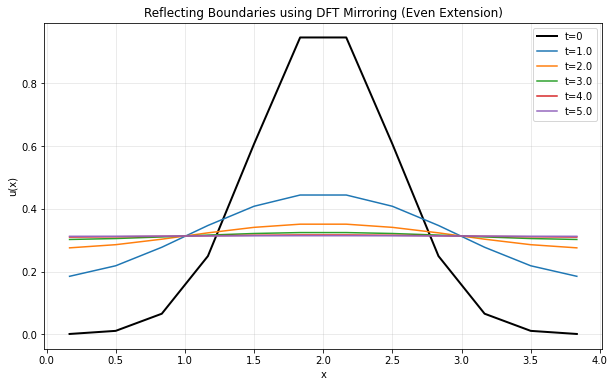

In [162]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Parameters
L = 4.0            # Physical domain length
N = 12              # Points in physical domain
alpha = 0.5         # Diffusion coefficient
dt = 0.01           # Time step
steps = 500         # Number of iterations

# 2. Spatial Grid
dx = L / N
x = (np.arange(N) + 0.5) * dx  # Staggered grid (Half-sample)
# 3. Initial Condition: Gaussian pulse
u = np.exp(-(x - L/2)**2 / (2 * 0.5**2))

k = np.pi * np.fft.fftfreq(N, d=(L/M))
wavenumbers_sq = k**2

print(x)
print(u)
print(wavenumbers_sq)

# 5. Time Stepping Loop
plt.figure(figsize=(10, 6))
plt.plot(x, u, label='t=0', color='black', lw=2)

initial_mass = np.sum(u) * dx

for i in range(1, steps + 1):
    # --- Pseudospectral DFT Mirroring Step ---
    
    # a. Create Even Extension (Reflecting Symmetry)
    # This makes u_ext symmetric: [u0, u1, ... uN-1, uN-1, ... u0]
    # u_ext = np.concatenate([u, u[::-1]])
    
    # b. Forward FFT
    u_hat = np.fft.fft(u)
    
    # c. Apply Diffusion in Spectral Space
    # Update: u_hat(t+dt) = u_hat(t) * exp(-alpha * k^2 * dt)
    u_hat_new = u_hat * np.exp(-alpha * wavenumbers_sq * dt)
    
    # d. Inverse FFT and extract the real part
    u = np.real(np.fft.ifft(u_hat_new))
    
    # 6. Verification of Conservation
    if i % 100 == 0:
        current_mass = np.sum(u) * dx
        print(f"Step {i:3d} | Total Mass Error: {current_mass - initial_mass:.2e}")
        plt.plot(x, u, label=f't={i*dt:.1f}')

plt.title("Reflecting Boundaries using DFT Mirroring (Even Extension)")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [163]:
k = np.arange(N)
wavenumbers_sq = (2*k * np.pi / L)**2
print(wavenumbers_sq[:10])
print(wavenumbers_sq[-10:])

k = np.pi * np.fft.fftfreq(N, d=(L/M))
wavenumbers_sq = k**2
print(wavenumbers_sq[:10])
print(wavenumbers_sq[-10:])

[  0.           2.4674011    9.8696044   22.2066099   39.4784176
  61.68502751  88.82643961 120.90265391 157.91367042 199.85948912]
[  9.8696044   22.2066099   39.4784176   61.68502751  88.82643961
 120.90265391 157.91367042 199.85948912 246.74011003 298.55553313]
[ 0.          2.4674011   9.8696044  22.2066099  39.4784176  61.68502751
 88.82643961 61.68502751 39.4784176  22.2066099 ]
[ 9.8696044  22.2066099  39.4784176  61.68502751 88.82643961 61.68502751
 39.4784176  22.2066099   9.8696044   2.4674011 ]
